# Plots to analyze posterior

In [1]:
import os, sys
os.chdir('/Users/dananjayaliyanage/git/observables/vah_design/emulation')
sys.path.append('/Users/dananjayaliyanage/git/surmise/')

In [2]:
from plotting import *
from priors import xlimits

In [3]:
from priors import prior_VAH

In [4]:
xx = np.array([prior_VAH.rnd(200) for n in range(0,50)])

In [5]:
xx.shape

(50, 200, 15)

In [6]:
xlimits.shape

(15, 2)

In [7]:
import pickle
import pyximport
pyximport.install(setup_args={"include_dirs":np.get_include()},
                  reload_support=True)
                  
cal_name = 'VAH_' + 'PCSK' + '_calibrator'
with open(cal_name + '.pkl' , 'rb') as file:
    cal = pickle.load(file)   

In [8]:
random_draws_calibration_chain = False
# By setting above to true we will use surmise inbuilt random resampling of the MCMC chain that has been constructed during calibration.
# We also save the final chain as a csv file. Instead of random resampling we can directly load that. This will be redundant if we add
# a function to the calibration.py to return the full chain from the calibration instead of resampling. 
if random_draws_calibration_chain:
    post = cal.theta.rnd(40000)
    post_df = pd.DataFrame(post,columns=model_param_dsgn)
else:
    post = cal.info['thetarnd']
    post_df = pd.DataFrame(post,columns=model_param_dsgn)
prior = prior_VAH.rnd(post_df.shape[0])
prior_df = pd.DataFrame(prior,columns=model_param_dsgn)
    



In [9]:
print(post_df.shape, prior_df.shape)

(2000, 15) (2000, 15)


In [10]:
# If false, do not try to find the MAP value and load it from a saved file.
find_map_param = False 
from scipy import optimize
if find_map_param == True:
    bounds=[(a,b) for (a,b) in zip(xlimits[:,0],xlimits[:,1])]
    x0=[(a+b)/2 for (a,b) in zip(xlimits[:,0],xlimits[:,1])]

    print(bounds)
    rslt = optimize.differential_evolution(lambda x: -cal.theta.lpdf(theta=np.array(x).reshape(-1,15)).flatten(),
                                            bounds=bounds,
                                           maxiter=100000,
                                            tol=1e-9,
                                            disp=True)
    #rslt = optimize.minimize(lambda x: -cal.theta.lpdf(theta=np.array(x).reshape(-1,15)).flatten(), x0=x0, method= 'BFGS', bounds=bounds, tol=1e-7)
    print(rslt.x)
    MAP = rslt.x
    np.save(cal_name, MAP)
else:
    MAP = np.load(cal_name+'.npy')

In [11]:
MAP

array([19.91362628, -0.18545399,  0.91352832,  0.93994063,  1.50381846,
        0.135     ,  0.24119163,  0.1208487 ,  0.17916598,  1.33488538,
        0.04425403,  0.12015175,  0.04809464, -0.8       ,  0.59447471])

In [18]:
nsamples = 2000
prune = 1 

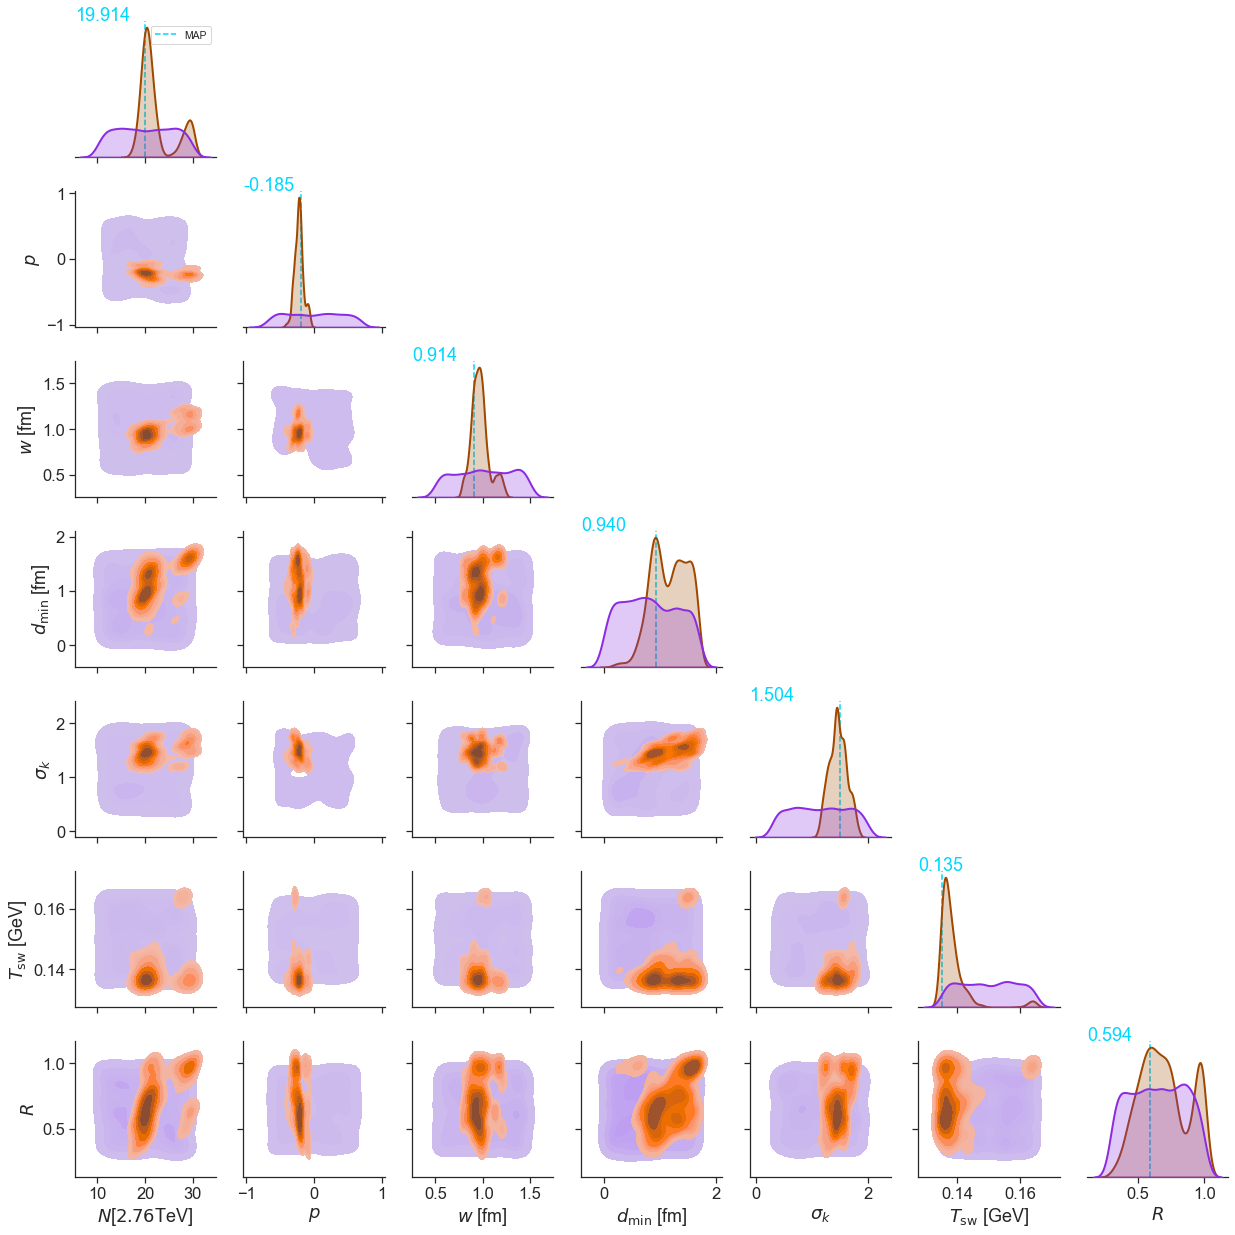

In [12]:
plot_corner_no_viscosity(post_df,prior_df,'PCSK',nsamples,prune, MAP)

In [13]:
print(post_df.shape, prior_df.shape)

(2000, 15) (2000, 15)


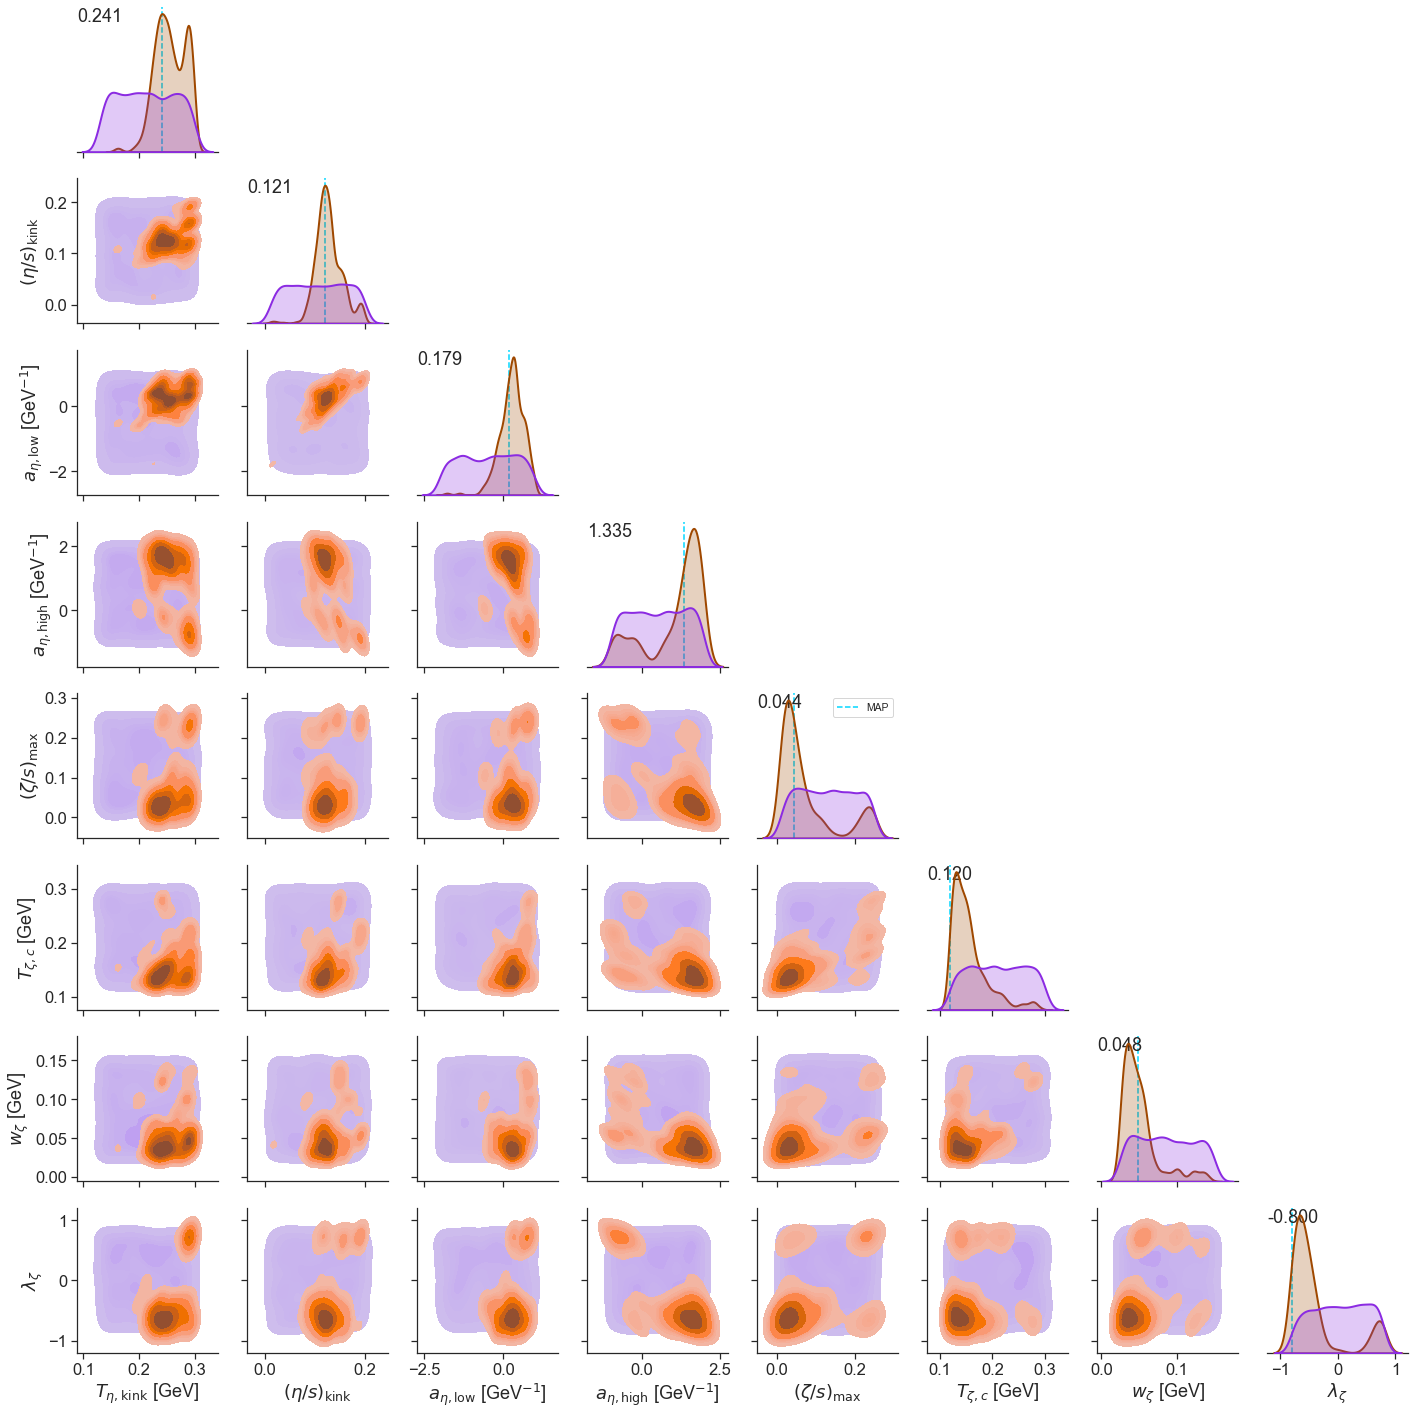

In [14]:
plot_corner_viscosity(post_df,prior_df,'PCSK',nsamples,prune, MAP)

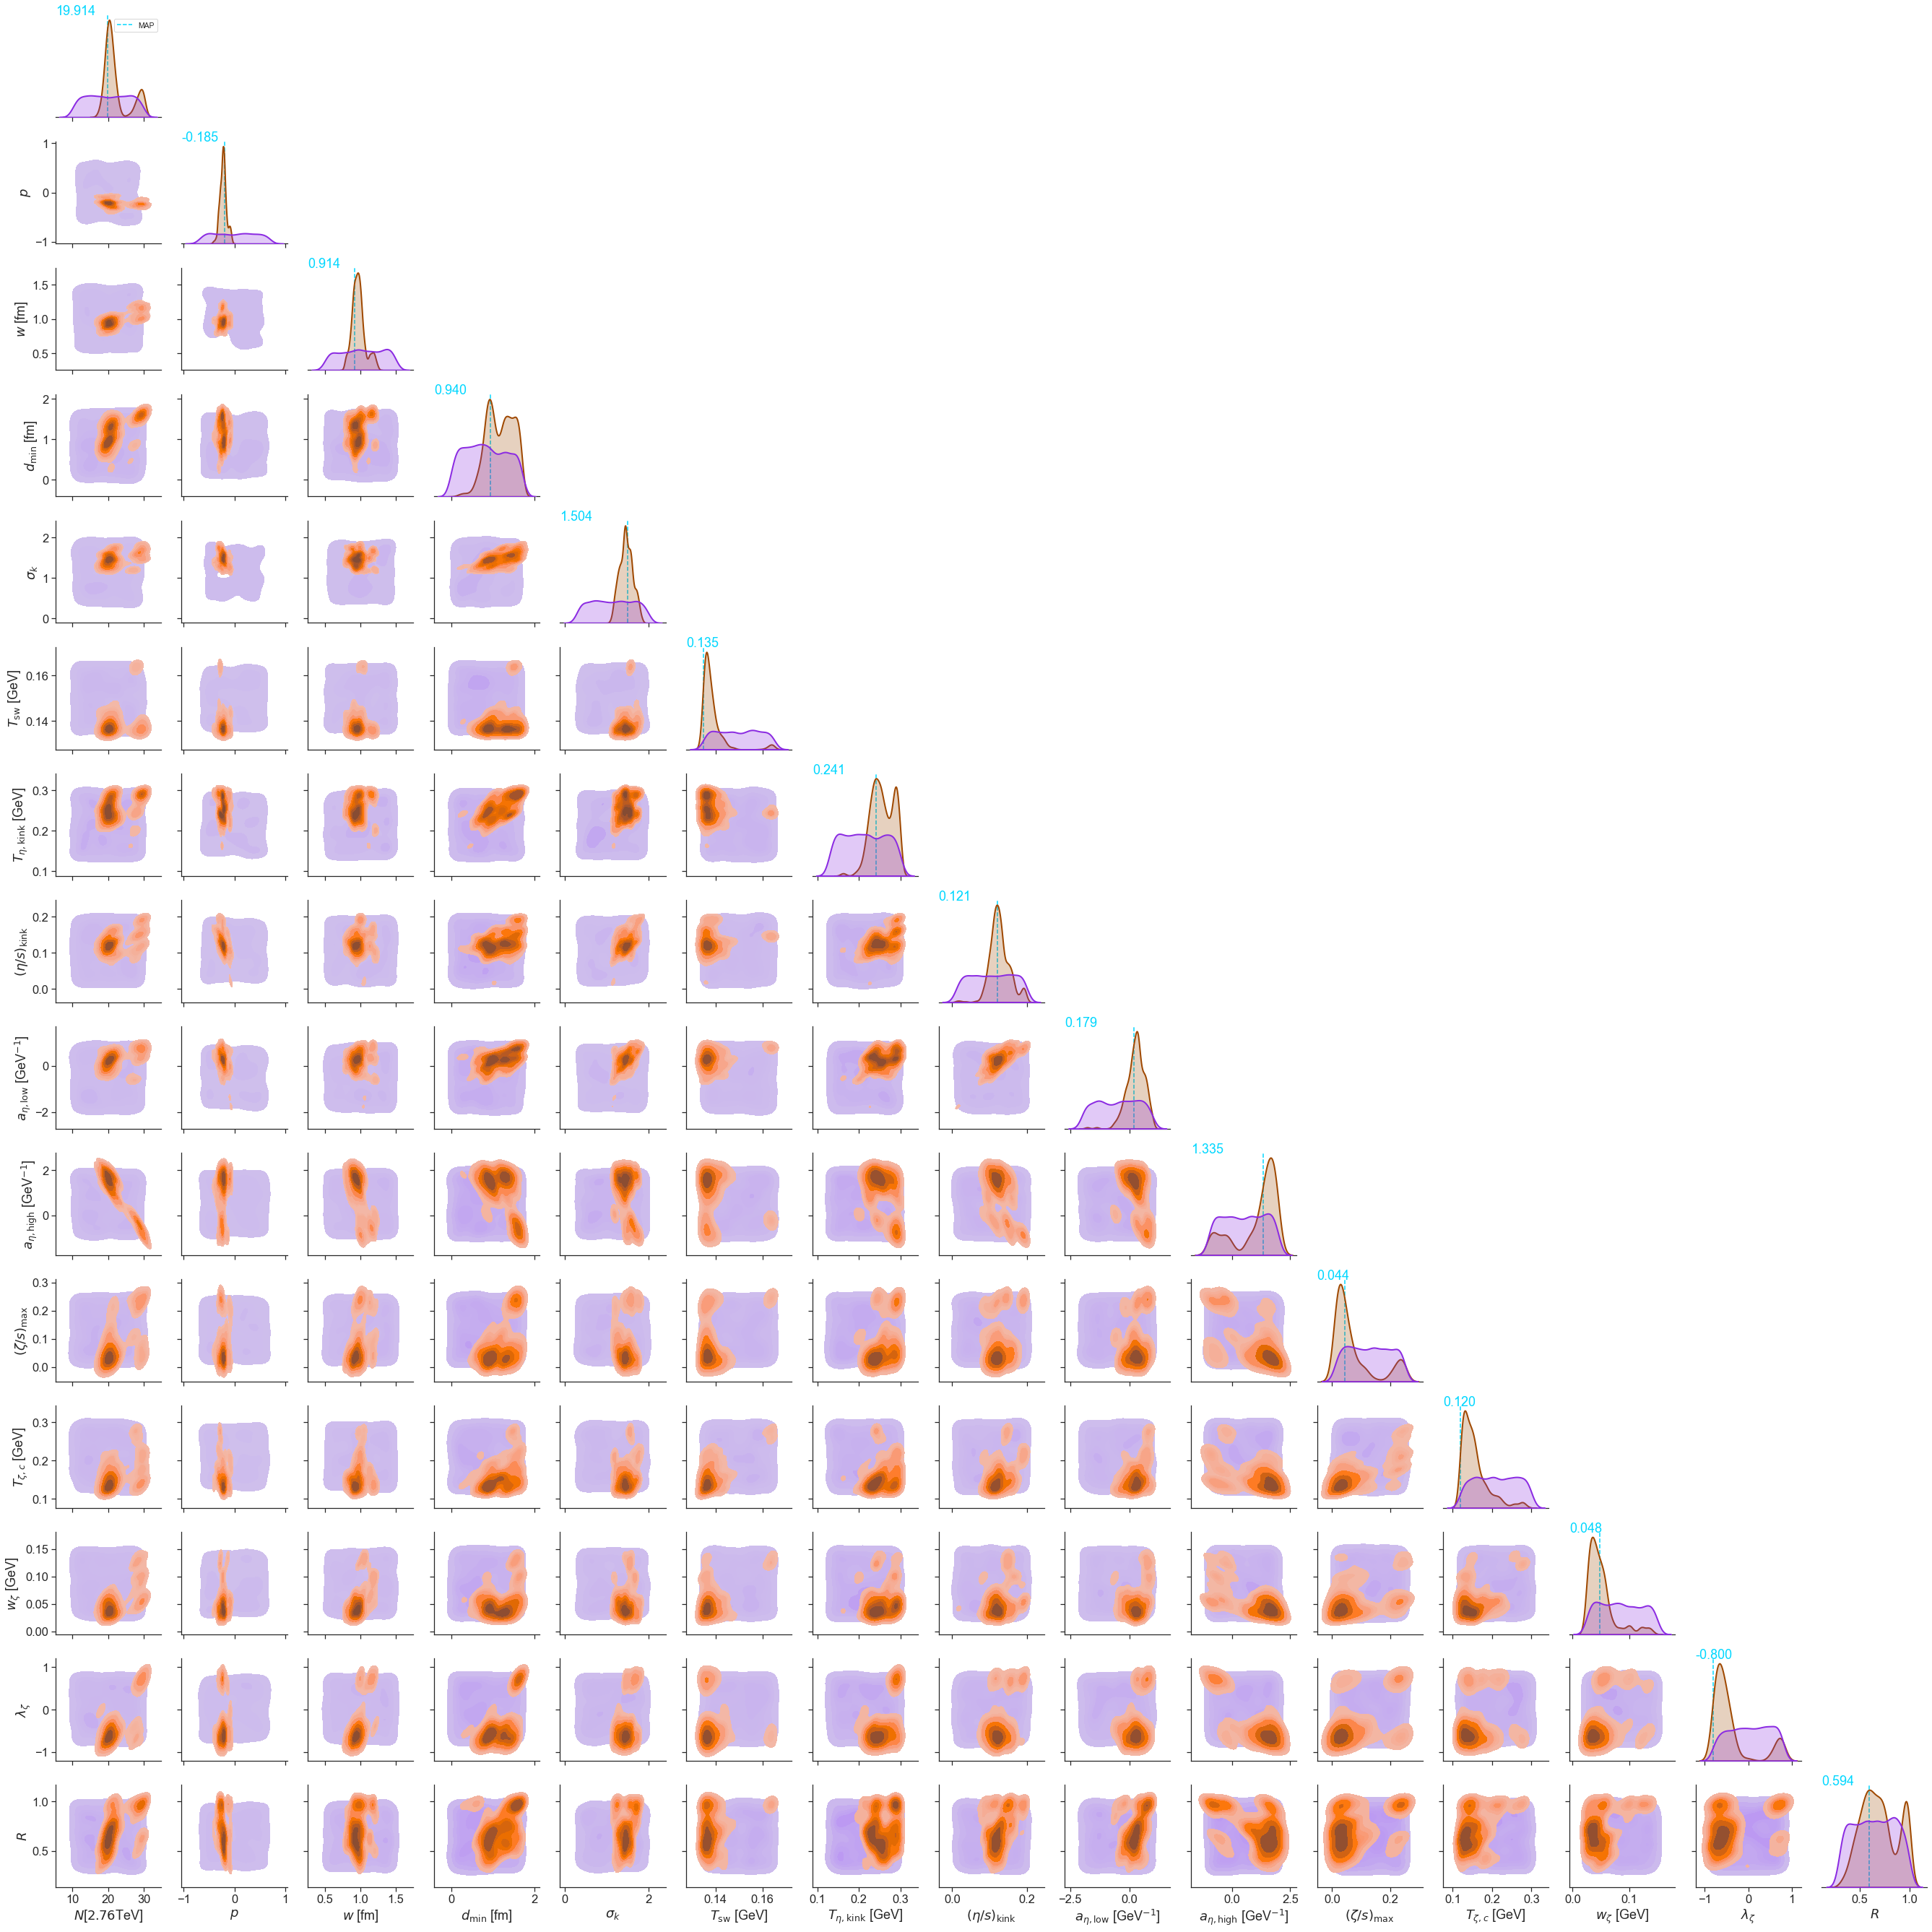

In [15]:
plot_corner_all(post_df,prior_df,'PCSK',nsamples,prune, MAP)

/Users/dananjayaliyanage/git/observables/vah_design/emulation/plotting.py:382: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


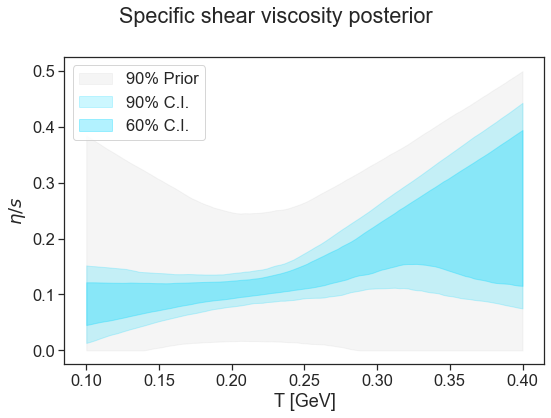

In [19]:
plot_shear(post_df,'PCSK',xlimits, nsamples,prune)

/Users/dananjayaliyanage/git/observables/vah_design/emulation/plotting.py:431: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


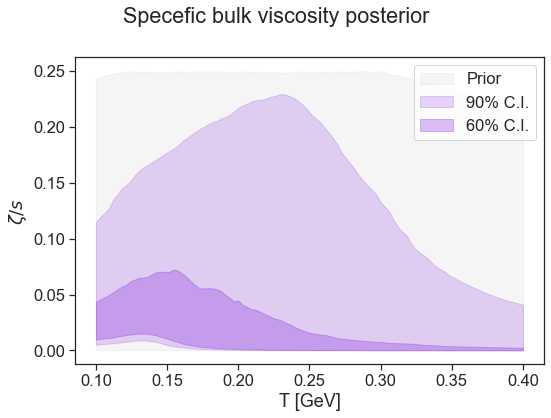

In [20]:
plot_bulk(post_df,'PCSK',xlimits, nsamples,prune)